https://github.com/gilbutITbook/006958/blob/master/deeplearning/deep_code/15_MNIST_Simple.py

## MNIST simple.ver

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os

# seed 값 설정
seed = 0
numpy.random.seed(seed)

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


In [2]:
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


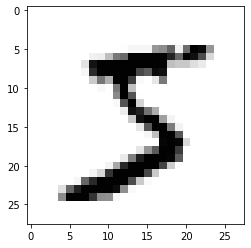

In [3]:
# 그래프로 확인
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [4]:
# 코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [ ]:
## 가로 28 X 세로 28 = 784개의 픽셀로 이루어진 이미지 데이터
## 각 픽셀은 밝기 정도에 따라 0부터 255까지의 등급을 매김
## 흰색 배경이 0이라면 글씨가 들어간 곳은 1~255숫자 중 하나로 채워져 긴 행렬로 이루어진 하나의 집합으로 변환됨
## 784개의 속성을 이용해 0~9까지 10개의 클래스 중 하나를 맞히는 문제가 됨

In [7]:
# 28 * 28의 2차원 배열을 784개의 1차원 배열로 차원 변환하기
# reshape(총 샘플 수, 1차원 속성의 수)
X_train = X_train.reshape(X_train.shape[0], 784)

# 케라스는 데이터를 0에서 1 사이의 값으로 변환한 다음 구동할 때 최적의 성능을 보임
# 따라서 현재 0~255 사이의 값으로 이루어진 값을 0~1 사이의 값으로 바꿔야 함
# 각 값을 255로 나누자
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [10]:
X_train[0]

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [9]:
# 클래스 값 확인
print("class : %d " % (Y_train[0]))

class : 5 


In [11]:
# 바이너리화 과정
# to_categorical(클래스, 클래스의 개수)
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [12]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
## 원핫인코딩이 적용되었음

In [13]:
# 모델 프레임 설정
# 총 784개의 속성과 10개의 클래스
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
# 모델의 성과를 저장하고 모델의 최적화 단계에서 학습을 자동 중단
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [16]:
# 모델의 실행
# 샘플 200개를 모두 30번 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.15063, saving model to ./model/01-0.1506.hdf5

Epoch 00002: val_loss improved from 0.15063 to 0.10546, saving model to ./model/02-0.1055.hdf5

Epoch 00003: val_loss improved from 0.10546 to 0.08302, saving model to ./model/03-0.0830.hdf5

Epoch 00004: val_loss improved from 0.08302 to 0.07723, saving model to ./model/04-0.0772.hdf5

Epoch 00005: val_loss improved from 0.07723 to 0.07255, saving model to ./model/05-0.0725.hdf5

Epoch 00006: val_loss improved from 0.07255 to 0.06889, saving model to ./model/06-0.0689.hdf5

Epoch 00007: val_loss improved from 0.06889 to 0.05986, saving model to ./model/07-0.0599.hdf5

Epoch 00008: val_loss did not improve from 0.05986

Epoch 00009: val_loss improved from 0.05986 to 0.05905, saving model to ./model/09-0.0591.hdf5

Epoch 00010: val_loss did not improve from 0.05905

Epoch 00011: val_loss did not improve from 0.05905

Epoch 00012: val_loss improved from 0.05905 to 0.05856, saving model to ./model

In [17]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0655 - accuracy: 0.9835

 Test Accuracy: 0.9835


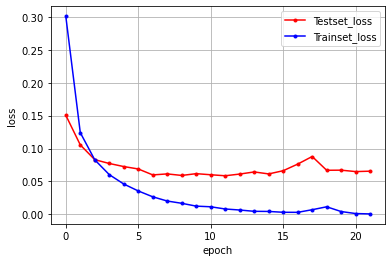

In [23]:
# 실행 결과를 그래프로 표현
# 학습셋의 정확도 대신 학습셋의 오차를 그래프로..

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
## 학습셋에 대한 오차는 계속해서 줄어듦
## 테스트셋의 과적합이 일어나기 전 학습을 끝낸 모습임

https://github.com/gilbutITbook/006958/blob/master/deeplearning/deep_code/16_MNIST_Deep.py

## MNIST deep.ver
딥러닝에 이미지 인식 분야에서 강력한 성능을 보이는 컨볼루션 신경망(CNN, Convolutional Neural Networks)을 얹어보자

https://gruuuuu.github.io/machine-learning/cnn-doc/#

http://taewan.kim/post/cnn/

### CNN
- 입력된 이미지에서 다시 한번 특징을 추출하기 위해 마스크(필터, 윈도 또는 커널)를 도입하는 기법
- 이미지에 필터를 합성곱하면 새로운 컨볼루션 층을 만들 수 있음(=이미지 데이터의 특징 추출)
- 이러한 필터를 여러 개 만들 경우 여러 개의 컨볼루션이 만들어짐
- 케라스에서 컨볼루션 층을 추가하는 함수 : Conv2D()

ex. model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
- 첫 번째 인자 : 필터를 몇 개 적용할지 정함, 여기서는 32개
- kernel_size : 필터(커널)의 크기를 정함, kernel_size=(행, 열)
- input_shape : Dense층과 마찬가지로 맨 처음 층엔 입력되는 값을 알려주어야 함. input_shape=(행, 열, 색상(3) 또는 흑백(1))
- activation : 활성화 함수를 정의

### 맥스 풀링
- 앞서 구현한 컨볼루션 층을 통해 이미지의 특성을 도출하였음
- 그러나 그 결과가 여전히 크고 복잡하여 이를 다시 한번 축소해야 함
- 이 과정을 풀링(pooling) 또는 서브 샘플링(subsampling)이라고 함
- 풀링 기법 중 가장 많이 사용되는 방법이 맥스 풀링
- 정해진 구역 안에서 가장 큰 값만 다음 층으로 넘기고 나머지는 버림
- 이 과정을 거쳐 불필요한 정보를 간추림!

ex. model.add(MaxPooling2D(pool_size=2))
- pool_size : 풀링 창의 크기를 정하는 것, 2로 정하면 전체 크기가 절반으로 줄어듦

### 드롭 아웃(Dropout)
- 과적합을 피하기 위해 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것

ex. model.add(Dropout(0.25)) : 25%의 노드를 끄자

### 플래튼(Flatten)
- 이러한 과정을 지나 Dense() 함수를 이용해 만들었던 기본 층에 연결하기 전에,
- Flatten 해주는 과정이 필요함
- 컨볼루션 층이나 맥스 풀링은 주어진 이미지를 2차원 배열인 채로 다루기 떄문

ex. model.add(Flatten())


### 딥러닝 프레임
X1 ... Xn -> 컨볼루션 층1 -> 컨볼루션 층2 -> ... -> 맥스 풀링 -> 드롭 아웃 -> 플래튼 -> 히든 레이어(Dense) -> 드롭 아웃 -> 출력

In [31]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os

# seed 값 설정
seed = 0
numpy.random.seed(seed)

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [32]:
# 차원 변환
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [33]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


In [34]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])



Epoch 00001: val_loss improved from inf to 0.06012, saving model to ./model/01-0.0601.hdf5

Epoch 00002: val_loss improved from 0.06012 to 0.03746, saving model to ./model/02-0.0375.hdf5

Epoch 00003: val_loss did not improve from 0.03746

Epoch 00004: val_loss improved from 0.03746 to 0.03513, saving model to ./model/04-0.0351.hdf5

Epoch 00005: val_loss improved from 0.03513 to 0.03192, saving model to ./model/05-0.0319.hdf5

Epoch 00006: val_loss improved from 0.03192 to 0.02743, saving model to ./model/06-0.0274.hdf5

Epoch 00007: val_loss did not improve from 0.02743

Epoch 00008: val_loss did not improve from 0.02743

Epoch 00009: val_loss improved from 0.02743 to 0.02632, saving model to ./model/09-0.0263.hdf5

Epoch 00010: val_loss improved from 0.02632 to 0.02592, saving model to ./model/10-0.0259.hdf5

Epoch 00011: val_loss did not improve from 0.02592

Epoch 00012: val_loss did not improve from 0.02592

Epoch 00013: val_loss did not improve from 0.02592

Epoch 00014: val_lo

In [35]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


313/313 [==============================] - 5s 17ms/step - loss: 0.0297 - accuracy: 0.9940

 Test Accuracy: 0.9940


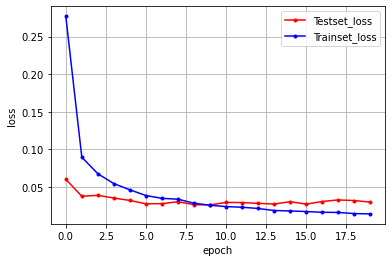

In [36]:
# 그래프로 표현

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [38]:
xxx = numpy.array([range(10), range(11, 21)])

In [39]:
xxx.shape

(2, 10)

In [40]:
xxx

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]])